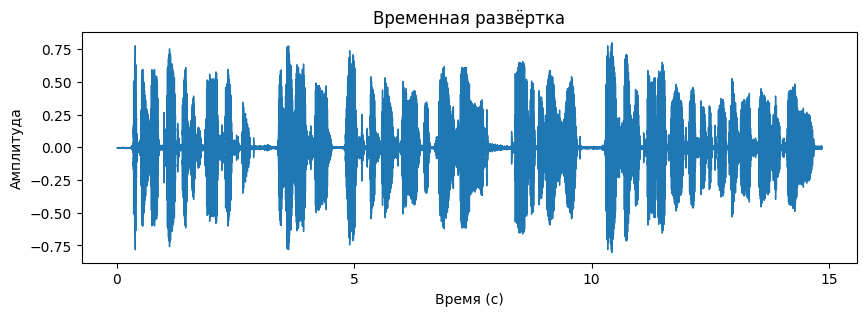

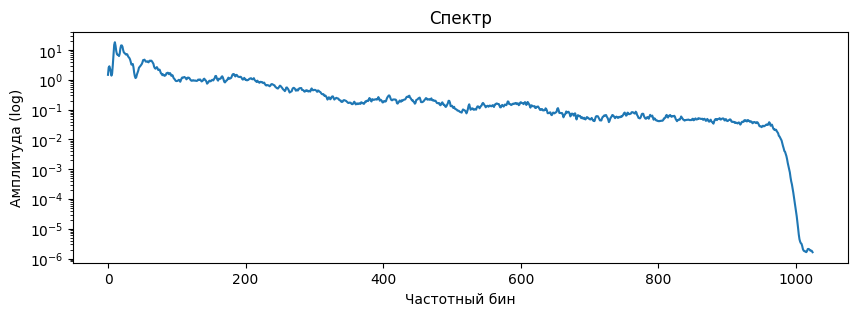

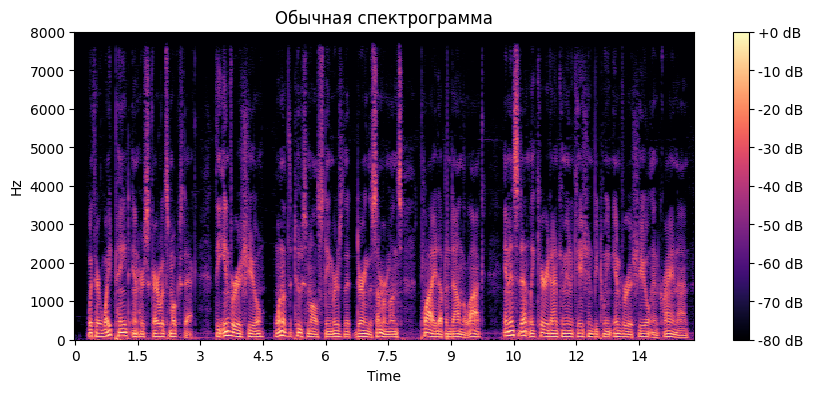

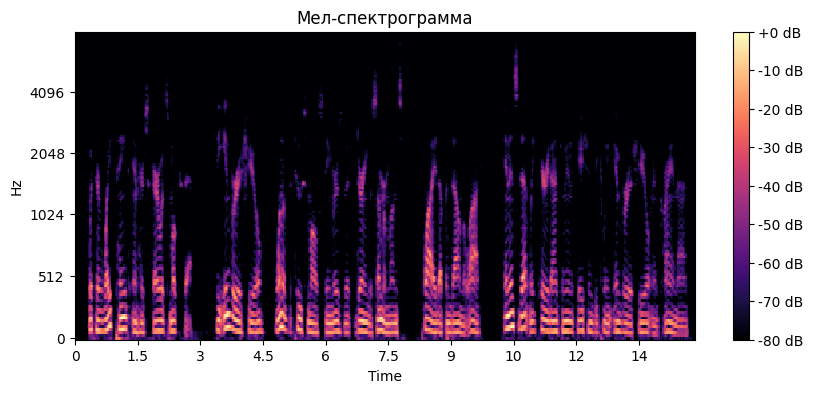

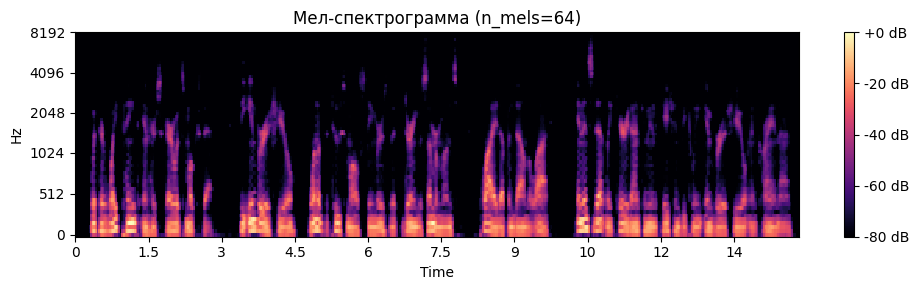

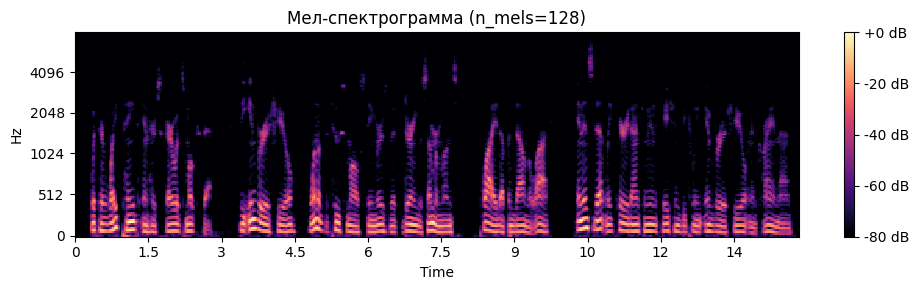

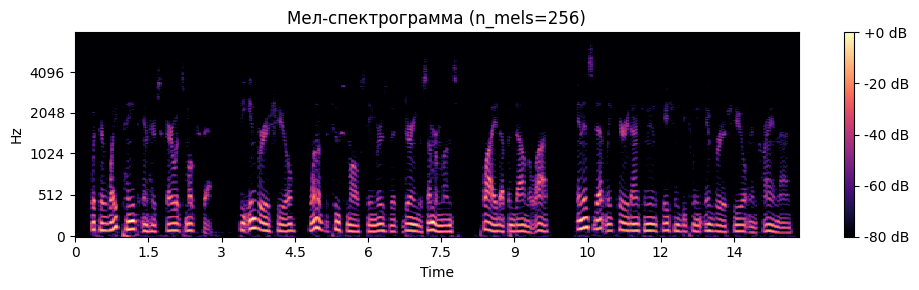

In [2]:
!pip install librosa matplotlib scipy

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from IPython.display import Audio

# === Задание 1: Загрузка и визуализация сигнала ===

# Загрузка аудиофайла (можно заменить путь на свой)
audio_path = librosa.example('libri1')  # или загружаемый файл
y, sr = librosa.load(audio_path, sr=16000)  # 16 кГц

# Временная развёртка
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title('Временная развёртка')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.show()

# Спектр
D = np.abs(librosa.stft(y))
plt.figure(figsize=(10, 3))
plt.semilogy(np.mean(D, axis=1))
plt.title('Спектр')
plt.xlabel('Частотный бин')
plt.ylabel('Амплитуда (log)')
plt.show()

# === Задание 2: Спектрограмма и мел-спектрограмма ===

# STFT спектрограмма
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Обычная спектрограмма')
plt.show()

# Мел-спектрограмма
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Мел-спектрограмма')
plt.show()

# === Задание 3: Влияние n_mels ===

for n_mels in [64, 128, 256]:
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    S_dB = librosa.amplitude_to_db(S, ref=np.max)
    plt.figure(figsize=(10, 3))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Мел-спектрограмма (n_mels={n_mels})')
    plt.tight_layout()
    plt.show()

